#### **E COMMERCE CCOHORT ANALYSIS**

In [1]:
## importing necessary libraries  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
import pandas as pd  
import datetime as dt   
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
## loading the data  
data =pd.read_csv(r"C:\Users\HP\Downloads\Dataset_ecommerce\Dataset_ecommerce.csv")
## displaying the first five rows 
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [3]:
## checking the shape of the data   
data.shape

(541909, 8)

In [4]:
## checking for general info  
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   InvoiceDate  541909 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    541909 non-null  object 
 4   Description  541909 non-null  object 
 5   Quantity     541909 non-null  int64  
 6   UnitPrice    541909 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
## convererting Invoce Date to Datetime formaat  
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [6]:
## checking for missing vales 
data.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [7]:
## checking for the percentage of missing values  
data.isnull().mean()*100

InvoiceNo       0.000000
InvoiceDate     0.000000
CustomerID     24.926694
StockCode       0.000000
Description     0.000000
Quantity        0.000000
UnitPrice       0.000000
Country         0.000000
dtype: float64

In [8]:
## checking for duplicates    
data.duplicated(keep='first').sum()

0

### **Descriptive Statistics**

In [9]:
## checking for descriptive stats for the numerric o]columns  
data.describe().T

,count,mean,min,25%,50%,75%,max,std
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303
Quantity,541909.0,50.534748,1.0,26.0,51.0,76.0,100.0,28.849367
UnitPrice,541909.0,50.476354,1.0,25.75,50.43,75.18,100.0,28.564775


In [10]:
## checking for categorical columns  
data.describe(include='object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,9000,SC2014,96
Description,541909,10,Sports Equipment,54765
Country,541909,28,Cote d'Ivoire,19651


### **EXPLORATORY DATA ANNALYSIS**

In [20]:
# Put the DataFrame in Descending
quantity_by_country = data.groupby(['Country'])['Quantity'].sum().reset_index()
quantity_by_country = quantity_by_country.sort_values('Quantity', ascending = False).reset_index()
quantity_by_country

,index,Country,Quantity
0,4,Cote d'Ivoire,993238
1,1,Benin,989802
2,23,Togo,988370
3,20,South Africa,987630
4,27,Zimbabwe,983769
5,15,Nigeria,983413
6,16,Rwanda,982491
7,6,Ethiopia,982073
8,18,Sierra Leone,980644
9,21,Sudan,979138


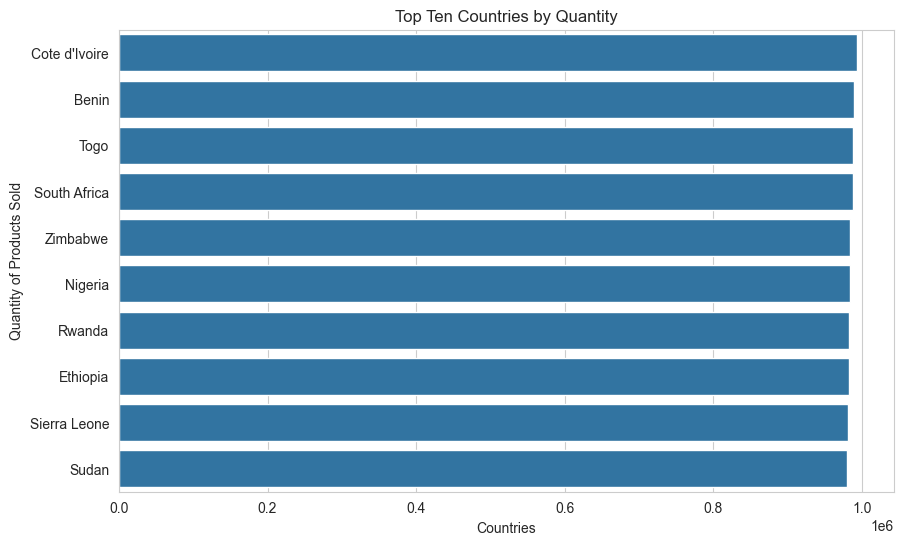

In [21]:
## plotting the top 10  
top_10_country = quantity_by_country.head(10)

plt.figure(figsize = (10, 6))
ax = sns.barplot(x = 'Quantity' , y = 'Country', data = top_10_country)
 
plt.xlabel('Countries')
plt.ylabel('Quantity of Products Sold')
plt.title('Top Ten Countries by Quantity')
plt.show()

In [22]:
# Calculate the number of unique customers per country
country_to_customer = data.groupby(['Country'])['CustomerID'].nunique()

# Sort the values in descending order and reset the index
country_to_customer = country_to_customer.sort_values(ascending=False).reset_index()
country_to_customer.head(10)

,Country,CustomerID
0,Mozambique,3072
1,Benin,3054
2,Togo,3053
3,Nigeria,3051
4,Burkina Faso,3049
5,Sierra Leone,3046
6,Mali,3044
7,Algeria,3043
8,Senegal,3040
9,Niger,3039


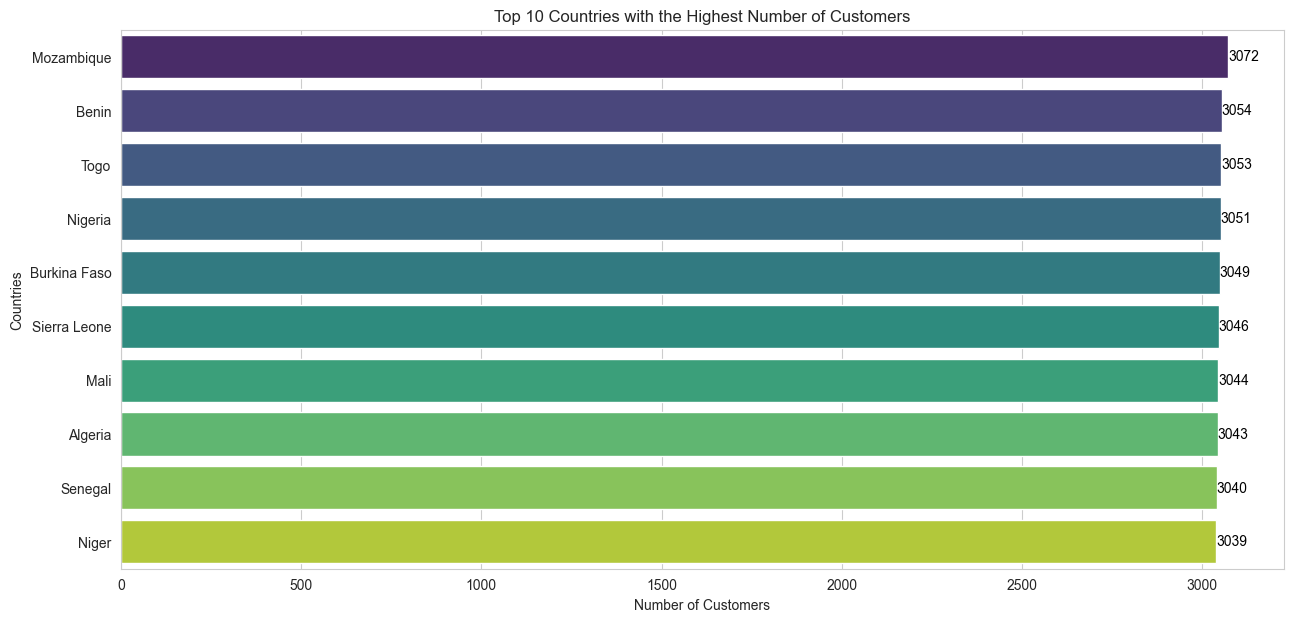

In [23]:
top_countries_with_most_customers = country_to_customer.head(10)

# Plotting the bar chart
plt.figure(figsize=(15, 7))
ax = sns.barplot(x='CustomerID', y='Country', data= top_countries_with_most_customers, palette="viridis")

# Adding data values (annotations) to the bars
for index, value in enumerate(top_countries_with_most_customers['CustomerID']):
    plt.text(value, index, f'{value:.0f}', color='black', ha="left", va="center")

# Setting the labels and title
plt.xlabel('Number of Customers')
plt.ylabel('Countries')
plt.title('Top 10 Countries with the Highest Number of Customers')
plt.show()


**Sales Trend Visualization**

In [25]:
monthly_sale = data.groupby(data['InvoiceDate'].dt.to_period('M'))['Quantity'].sum()
monthly_sale

InvoiceDate
2010-12    2136405
2011-01    1778655
2011-02    1406427
2011-03    1857483
2011-04    1516733
2011-05    1866682
2011-06    1855719
2011-07    1999932
2011-08    1777279
2011-09    2540506
2011-10    3068669
2011-11    4290922
2011-12    1289823
Freq: M, Name: Quantity, dtype: int64

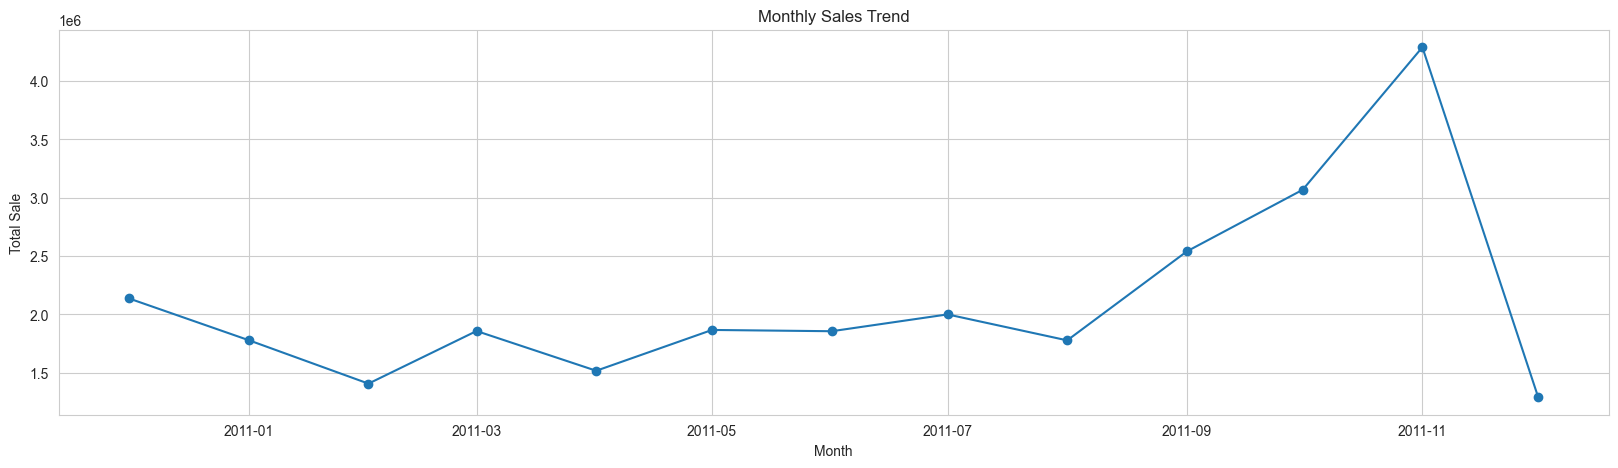

In [35]:
# Create a line plot
plt.figure(figsize = (20, 5))
plt.plot(monthly_sale.index.to_timestamp(), monthly_sale.values, marker = 'o', linestyle = '-')
# Setting the labels and title
plt.xlabel('Month')
plt.ylabel('Total Sale')
plt.title('Monthly Sales Trend')
plt.grid(True)
plt.show()

#### **Cohort Analysis**

In [36]:
# function for month
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

#Apply the function
data['InvoiceMonth'] = data['InvoiceDate'].apply(get_month)
data.tail()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,InvoiceMonth
541904,581587,2011-12-09 12:50:00,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-12-01
541905,581587,2011-12-09 12:50:00,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-12-01
541906,581587,2011-12-09 12:50:00,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-12-01
541907,581587,2011-12-09 12:50:00,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-12-01
541908,581587,2011-12-09 12:50:00,12680.0,SC9276,Toys,6,46.62,Ethiopia,2011-12-01


### Create a column index with the minimum invoice date aka first time customer was acquired

In [37]:
data['Cohort Month'] = data.groupby('CustomerID')['InvoiceMonth'].transform('min')
data.head(3)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,InvoiceMonth,Cohort Month
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01,2010-12-01
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01,2010-12-01
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01,2010-12-01


### Create a date element function to get a series for substraction

In [38]:
def get_date_elements(df, column):
    day = df[column].dt.day
    month = df[column].dt.month
    year = df[column].dt.year
    return day, month, year

In [39]:
## Get the date element for our corhot and invoce columns

_, Invoice_month, Invovice_year = get_date_elements(data, 'InvoiceMonth')
_, Cohort_month, Cohort_year = get_date_elements(data, 'Cohort Month')

# Create a cohort index

In [40]:
# Create a cohort index
year_diff = Invovice_year - Cohort_year
month_diff = Invoice_month - Cohort_month

data['Cohortindex'] = year_diff*12+month_diff+1
data.head(5)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,InvoiceMonth,Cohort Month,Cohortindex
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01,2010-12-01,1.0
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01,2010-12-01,1.0
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01,2010-12-01,1.0
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01,2010-12-01,1.0
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01,2010-12-01,1.0


In [41]:

# Count the Customer ID by Brouping  by Corhot Month and Corhot Index
cohort_data = data.groupby(['Cohort Month', 'Cohortindex'])['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_data

,Cohort Month,Cohortindex,CustomerID
0,2010-12-01,1.0,948
1,2010-12-01,2.0,362
2,2010-12-01,3.0,317
3,2010-12-01,4.0,367
4,2010-12-01,5.0,341
...,...,...,...
86,2011-10-01,2.0,93
87,2011-10-01,3.0,46
88,2011-11-01,1.0,321
89,2011-11-01,2.0,43


# Create a pivot table 

In [42]:
#Create a pivot table
cohort_table = cohort_data.pivot(index = 'Cohort Month', columns = ['Cohortindex'], values =  'CustomerID')
# Change index
cohort_table.index = cohort_table.index.strftime('%B, %Y')
cohort_table

Cohortindex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
Cohort Month,,,,,,,,,,,,,
"December, 2010",948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
"January, 2011",421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
"February, 2011",380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
"March, 2011",440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
"April, 2011",299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
"May, 2011",279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
"June, 2011",235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
"July, 2011",191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"August, 2011",167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# visualise our result in heatmap 

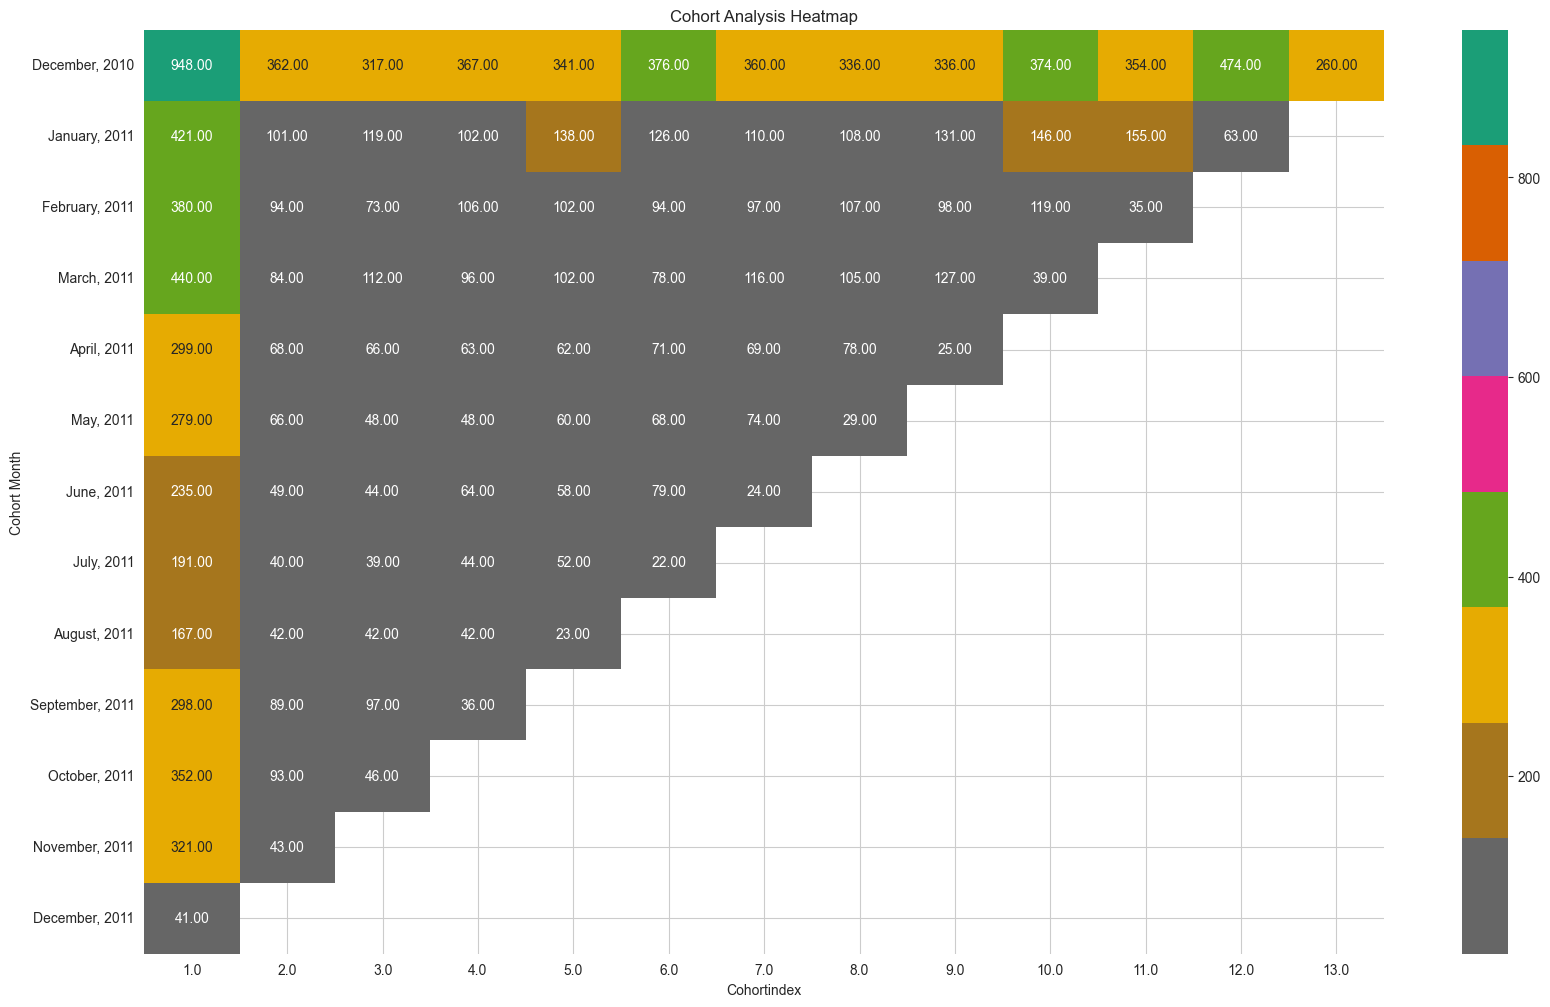

In [43]:
# visualise our result in heatmap 
plt.figure(figsize = (20, 12))
sns.heatmap(cohort_table, annot = True, cmap = 'Dark2_r', fmt = '.2f')
plt.title('Cohort Analysis Heatmap')
plt.show()

# Cohort table for percentage

In [44]:
# Cohort table for percentage 
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0], axis =0)
new_cohort_table

Cohortindex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
Cohort Month,,,,,,,,,,,,,
"December, 2010",1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
"January, 2011",1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
"February, 2011",1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
"March, 2011",1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
"April, 2011",1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
"May, 2011",1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
"June, 2011",1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
"July, 2011",1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"August, 2011",1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# visualise our chort Analysis in heatmap in percentages 

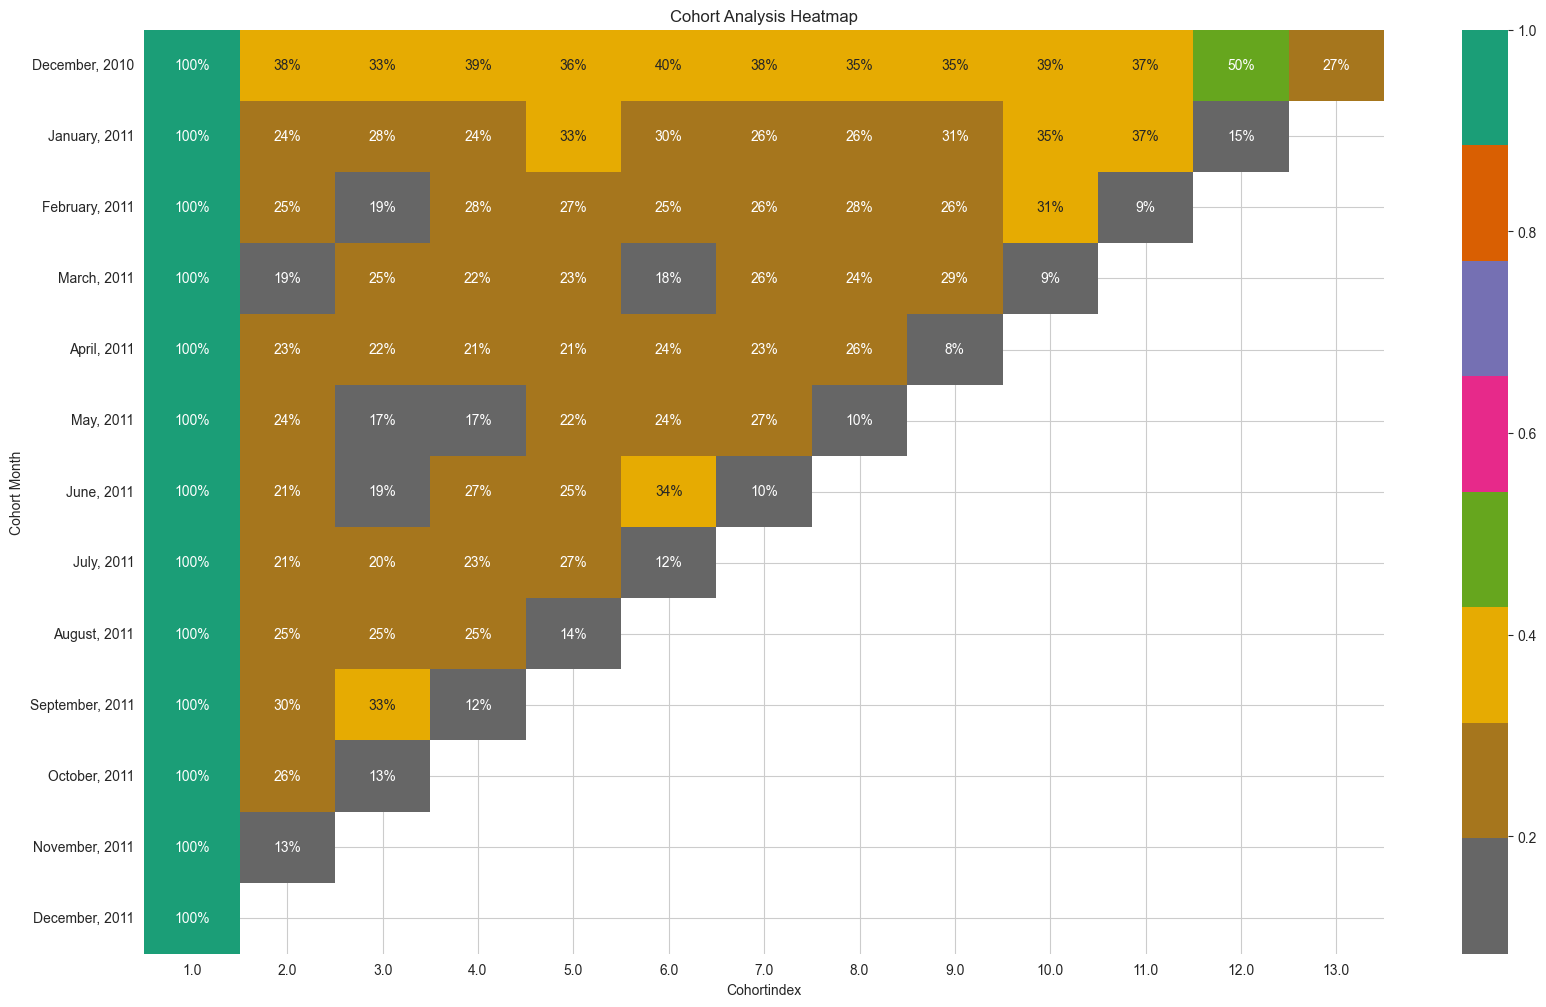

In [45]:
# visualise our result in heatmap in percentages 
plt.figure(figsize = (20, 12))
sns.heatmap(new_cohort_table, annot = True, cmap = 'Dark2_r', fmt = '.0%')
plt.title('Cohort Analysis Heatmap')
plt.show()

### Key Insights:

1. Initial Engagement Drop-Off: Significant drop in customer retention after the first month across all cohorts.
2. Mid-Term Fluctuations: Some months show unexpected increases in retention—likely due to promotions or seasonal factors.
3. Long-Term Decline: A general trend of decreasing customer engagement over time.